# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

>Project
>In this project we aim to address the household problem involving a male and a woman. Their objective is to optimize their utility by choosing between home production and labor market activities, which provide them with wages $W_{m}$ and $W_{f}$. The household derives utility from consuming goods and household production, but experiences disutility from working. The budget constraint is set such that the total consumption is equal their total wage income.
To maximize their utility, the household determines the optimal allocation of labor between male and women members for household production and labor market, represented by $H_{f}$, by $H_{m}$, $L_{f}$, and $L_{f}$.

Imports and set magics:

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

> In this question we assume that the choice set is discrete in half hours. $\alpha$ is varying $\in \{0.25, 0.50, 0.75\}$ and $\sigma$ is set to $\{0.5, 1.0, 1.5\}$.
We illstrate how $\frac{{H}_{F}}{{H}_{M}}$ changes by making a plot

In [11]:
alpha_values = [ 0.25, 0.5, 0.75]
sigma_values = [ 0.5, 1.0, 1.5]
res = {}

#Discrete solving for every combination of alpha and sigma:
for sigma in sigma_values:
    model.par.sigma = sigma
    for alpha in alpha_values:
        model.par.alpha = alpha
        opt = model.solve_discrete()
        #Saving results
        HFHM_ratio = opt.HF/opt.HM
        res[(alpha, sigma)] = HFHM_ratio
        
        #Printing results
        # print(f'For (\u03b1, \u03c3) = ({model.par.alpha:.2f}, {model.par.sigma:.2f}):    HF = {opt.HF:.2f}, HM = {opt.HM:.2f}, HF/HM: {HFHM_ratio:.2f}')

#Plotting HF/HM on alpha for every valye of sigma:
fig, ax = plt.subplots()
for sigma in sigma_values:
    y = [res[(alpha, sigma)] for alpha in alpha_values]
    ax.plot(alpha_values, y, label=f"$\u03c3$ = {sigma}")
ax.set_xlabel("$\u03b1$")
ax.set_ylabel("$H_F/H_M$")
ax.legend()
plt.show()

NameError: name 'model' is not defined

The graph shows that when the productivity parameter $\alpha$ is greater than 0.5, it is optimal for women to allocate more time to household production than men, and vice versa.
When $\alpha$ is $0.5$ the wage rate for men and women in the labor market is the same, then men and women will work the same of hours in household production.



# Question 2

We use an array of different values for female wage instead of the intitial value. For each on the entries in the array, we use the descrete solver provided to find the optimal amount of house work. The results are stored in two new arrays which in turn are used as coordinates in a plot.

In this question we plot the log of hours to household production for men and women against the log of the relate wages of men and women for $w_{F}$ set to $\in$ \[0.8, 0.9, 1.0, 1.1, 1.2\], where the choice set is discrete. 

In [ ]:
model.par.alpha = 0.5
model.par.sigma = 1
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
res_HFHM_d = np.empty(5)
res_wFwM_d = np.empty(5)

#Discrete solving:
for i, wF in enumerate(wF_values):
    model.par.wF = wF
    opt = model.solve_discrete()
    #Saving results
    res_HFHM_d[i] = np.log(opt.HF/opt.HM)
    res_wFwM_d[i] = np.log(model.par.wF/model.par.wM)
#print 
#Printing optimal values

#Plot the the 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(res_wFwM_d, res_HFHM_d)
ax.set_xlabel("log $w_F$ - log $w_M$")
ax.set_ylabel("log $H_F$ - log $H_M$")
plt.show()

The optimal female contribution in the household production decreases as the relative wage for women in the labor market increases. A higher wage for women makes their involvement in household production more costly leading them to allocate more time to the labor market compared to men. Between 0.9 and 1.0 there is no difference in the relative household hours. 


# Question 3

In this question we plot the log of hours to household production for men and women against the log of the relate wage of men and women for $w_{F}$ set to $\in$ \[0.8, 0.9, 1.0, 1.1, 1.2\] where the choice set is continuous.

In [ ]:
model.par.alpha = 0.5
model.par.sigma = 1
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
res_HFHM_c = np.empty(5)
res_wFwM_c = np.empty(5)


#Continuous solving:
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve()
    #Saving results
    res_HFHM_c[i] = np.log(opt.HF/opt.HM)
    res_wFwM_c[i] = np.log(model.par.wF/model.par.wM)
        
#Plotting
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(res_wFwM_c, res_HFHM_c)
ax.set_xlabel("log $w_F$ - log $w_M$")
ax.set_ylabel("log $H_F$ - log $H_M$")
plt.show()

The relationship between the wage and the contribution in the home production shows a steep line where an increase in the relative wage for women, decreases the contribution in the home production. 

# Question 4

We run a the following regression on time use data of couples: 
$$\log\frac{{H}_{F}}{{H}_{M}} = \beta_{0} + \beta_{1}\log\frac{{w}_{F}}{{w}_{M}}$$
We estimte $\beta_{0}$ and $\beta_{0}$ and find the $\sigma$ and $\alpha$ such that is minimizes
$$(\beta_{0}-\hat{\beta}_{0})^2+(\beta_{1}-\hat{\beta}_{1})^2$$
 
where $\beta_{0}=0.4$ and $\beta_{1}=-0.1$

beta_0 = 0.4000, beta_1 = -0.1000, alpha = 0.9820, sigma = 0.1000


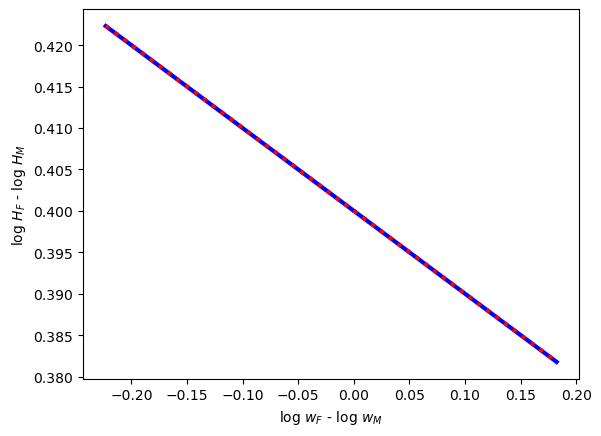

In [14]:

model.estimate()
print(f'beta_0 = {model.sol.beta0:.4f}, beta_1 = {model.sol.beta1:.4f}, alpha = {model.par.alpha:.4f}, sigma = {model.par.sigma:.4f}')

model.par.alpha = model.par.alpha
model.par.sigma = model.par.sigma
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
res_HFHM_c = np.empty(5)
res_wFwM_c = np.empty(5)
SY_plot = np.empty(5)

#Continuous solving:
for i, wF in enumerate(wF_values):
    model.par.wF = wF
    opt = model.solve()
    #Saving results
    res_HFHM_c[i] = np.log(opt.HF/opt.HM)
    res_wFwM_c[i] = np.log(model.par.wF)
    SY_plot[i] = 0.4 - 0.1*np.log(wF/model.par.wM)

#Plotting
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(res_wFwM_c, SY_plot, label = 'Seminski & Yetsenga', color = 'b', linestyle='-', alpha= 1, linewidth = 3)
ax.plot(res_wFwM_c, res_HFHM_c, label = 'Estimation', color = 'r', linestyle = ':', alpha=1, linewidth = 3)
ax.set_xlabel("log $w_F$ - log $w_M$")
ax.set_ylabel("log $H_F$ - log $H_M$")
plt.show()
    

Compared to the model by Siminski and Yetsenga we get almost the same result. 

Since $\alpha$ is approaching 1, the women household productivity is higher than to the men. 
Since there is a low elasticity of substitution, the home production can’t be replaced as easily from women to men. 
When $\sigma$ is approaching 0, this means that the ratio between women and men is productivity of household production is constant regardless of the level of wages. \
The paper finds that in overall women are expected to do more household work that men, which supports the relative wage distribution. There is a weak relationship between the relative wage and the allocation of household work. It also shows that women’s households work is associated with the relative wages which is not the case for the men’s.




# Question 5

Explain your code and procedure